# Task
Unemployment Analysis with Python Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.



## Data loading

### Subtask:
Load the unemployment data from the CSV file into a pandas DataFrame.


In [10]:
import pandas as pd
df = pd.read_csv("/content/Unemployment in India.csv")
display(df.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Data cleaning

### Subtask:
Clean the unemployment data by handling missing values and dropping duplicate rows.


In [11]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Strategy: Since there are a few missing values in ' Estimated Employed' and ' Estimated Labour Participation Rate (%)', I will fill them with the mean of the respective columns.
df[' Estimated Employed'].fillna(df[' Estimated Employed'].mean(), inplace=True)
df[' Estimated Labour Participation Rate (%)'].fillna(df[' Estimated Labour Participation Rate (%)'].mean(), inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Recheck for missing values and duplicate rows
missing_values_after = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after)

duplicate_rows_after = df.duplicated().sum()
print("\nNumber of duplicate rows after cleaning:", duplicate_rows_after)

Missing values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Number of duplicate rows: 27

Missing values after cleaning:
 Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        1
dtype: int64

Number of duplicate rows after cleaning: 0


<ipython-input-11-0f14f7ceb5f0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' Estimated Employed'].fillna(df[' Estimated Employed'].mean(), inplace=True)
<ipython-input-11-0f14f7ceb5f0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [12]:
df.dropna(inplace=True)

# Recheck for missing values and duplicate rows
missing_values_after = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after)

duplicate_rows_after = df.duplicated().sum()
print("\nNumber of duplicate rows after cleaning:", duplicate_rows_after)


Missing values after cleaning:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

Number of duplicate rows after cleaning: 0


## Data wrangling

### Subtask:
Transform the 'Date' column into datetime objects, and extract the month and year into separate columns. Also, rename the columns to more descriptive names.


In [13]:
import pandas as pd

# Convert 'Date' column to datetime objects
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

# Extract month and year
df['Month'] = df[' Date'].dt.month
df['Year'] = df[' Date'].dt.year

# Rename columns
df.rename(columns={
    'Region': 'State',
    ' Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    ' Estimated Employed': 'Employed',
    ' Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Area': 'Area_Type',
    ' Date': 'Date'
}, inplace=True)

# Delete the 'Frequency' column
df.drop(' Frequency', axis=1, inplace=True)

display(df.head())

,State,Date,Unemployment_Rate,Employed,Labour_Participation_Rate,Area_Type,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019


## Data exploration

### Subtask:
Explore the distribution of unemployment rates and analyze how they change over time and across different regions.


In [14]:
# Descriptive statistics for 'Unemployment_Rate'
print("Descriptive Statistics for Unemployment Rate:")
print(df['Unemployment_Rate'].describe())
print("-" * 50)

# Average unemployment rate for each state
avg_unemployment_by_state = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
print("\nAverage Unemployment Rate by State (Descending):")
print(avg_unemployment_by_state)
print("-" * 50)

# Average unemployment rate for each year
avg_unemployment_by_year = df.groupby('Year')['Unemployment_Rate'].mean().sort_index()
print("\nAverage Unemployment Rate by Year (Chronological):")
print(avg_unemployment_by_year)
print("-" * 50)

# Average unemployment rate for each month
avg_unemployment_by_month = df.groupby('Month')['Unemployment_Rate'].mean().sort_index()
print("\nAverage Unemployment Rate by Month (Chronological):")
print(avg_unemployment_by_month)
print("-" * 50)

# Correlation matrix
correlation_matrix = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for Unemployment Rate:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Unemployment_Rate, dtype: float64
--------------------------------------------------

Average Unemployment Rate by State (Descending):
State
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim           

## Data visualization

### Subtask:
Visualize the unemployment rate trends over time, by region, and other relevant factors.


<ipython-input-15-3c84b90e0868>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemployment_by_state.index, y=avg_unemployment_by_state.values, palette='viridis')


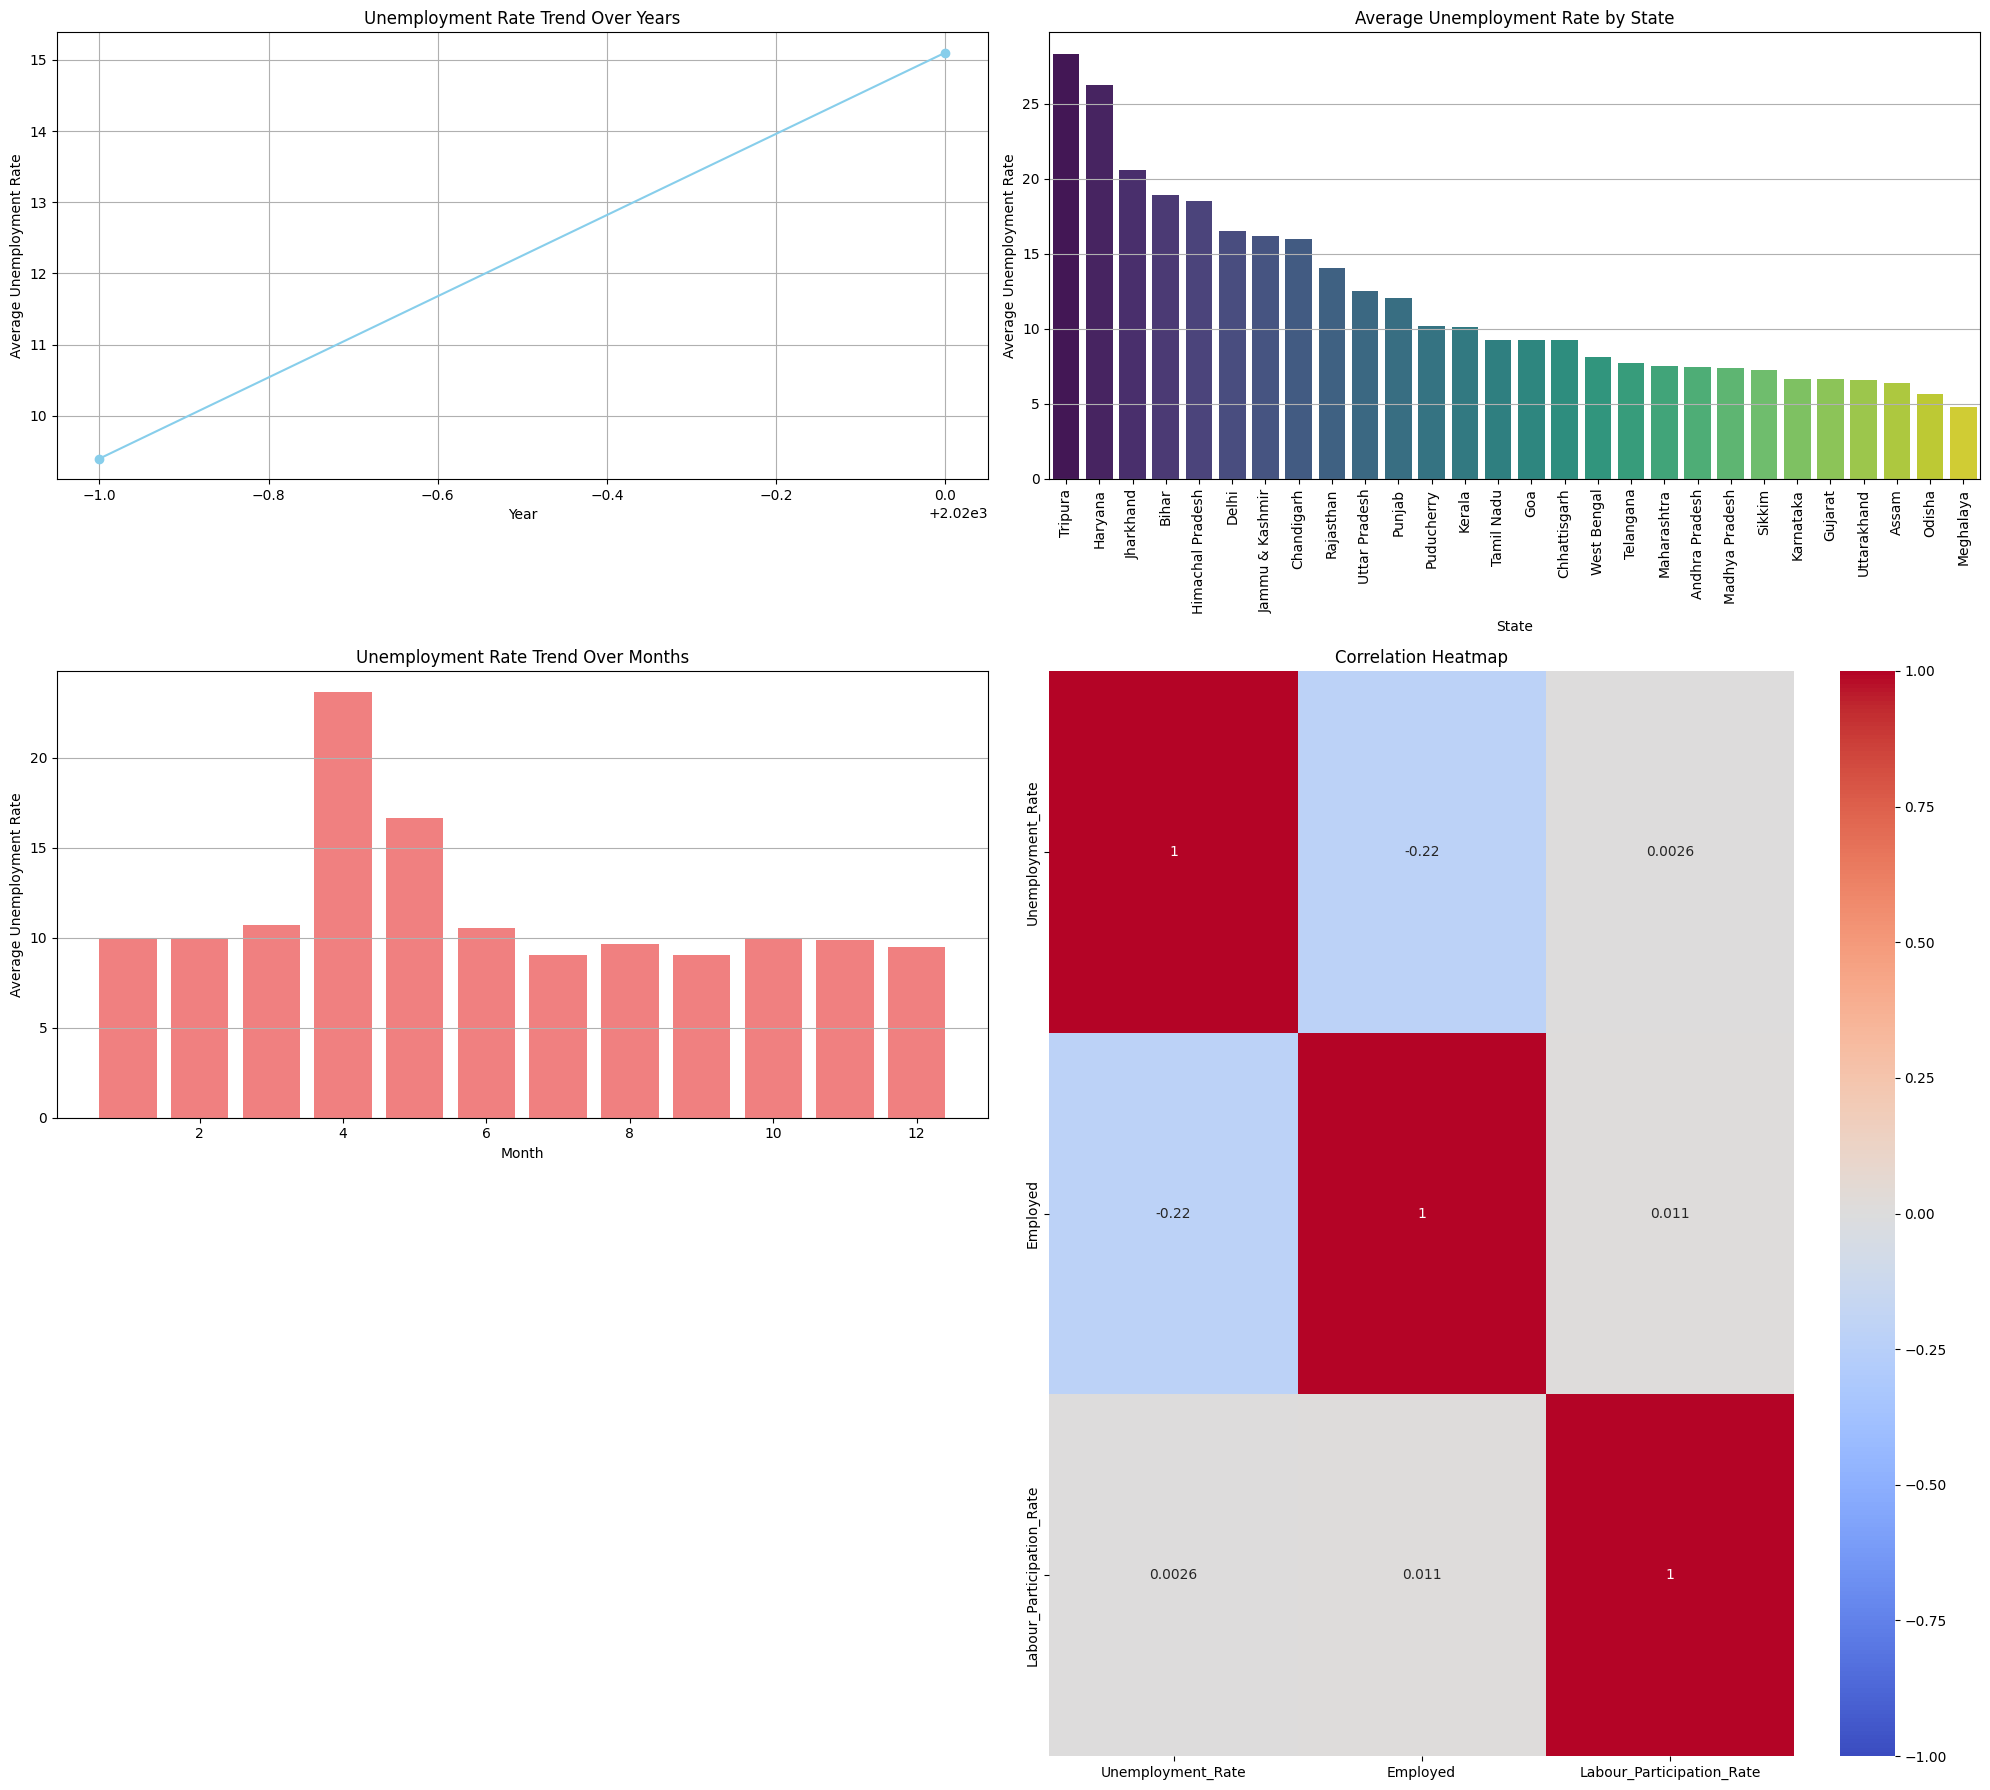

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))

# 1. Line plot for Unemployment Rate Trend Over Years
plt.subplot(3, 2, 1)
avg_unemployment_by_year = df.groupby('Year')['Unemployment_Rate'].mean()
plt.plot(avg_unemployment_by_year.index, avg_unemployment_by_year.values, marker='o', color='skyblue')
plt.title('Unemployment Rate Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)

# 2. Bar plot for Average Unemployment Rate by State
plt.subplot(3, 2, 2)
avg_unemployment_by_state = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=avg_unemployment_by_state.index, y=avg_unemployment_by_state.values, palette='viridis')
plt.title('Average Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.grid(axis='y')

# 3. Bar plot for Unemployment Rate Trend Over Months
plt.subplot(3, 2, 3)
avg_unemployment_by_month = df.groupby('Month')['Unemployment_Rate'].mean()
plt.bar(avg_unemployment_by_month.index, avg_unemployment_by_month.values, color='lightcoral')
plt.title('Unemployment Rate Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.grid(axis='y')

# 4. Heatmap for Correlation Matrix
plt.subplot(3, 2, (4, 6))
correlation_matrix = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

*   **What is the average unemployment rate for each state?**
    *   The average unemployment rate varies significantly across states. Tripura has the highest average rate at 28.35%, followed by Haryana at 26.28%. Meghalaya has the lowest average unemployment rate at 4.80%.
*   **How has the average unemployment rate changed over the years?**
    *   The average unemployment rate increased from 9.40% in 2019 to 15.10% in 2020.
*   **Which month has the highest unemployment rate?**
    *   April has the highest average unemployment rate at 23.64%.
*   **What is the correlation between the unemployment rate and the number of people employed?**
    *   There is a negative correlation of -0.22 between the unemployment rate and the number of people employed.
*   **What is the correlation between the unemployment rate and the labour participation rate?**
    *   There is a near-zero correlation of 0.0026 between the unemployment rate and the labor participation rate.

### 2. Data Analysis Key Findings

*   **Descriptive Statistics:** The overall mean unemployment rate across the dataset is 11.79%, with a significant standard deviation of 10.72, indicating variability. The unemployment rate ranges from a minimum of 0.00% to a maximum of 76.74%.
*   **State-wise Analysis:** Tripura has the highest average unemployment rate at 28.35%, while Meghalaya has the lowest at 4.80%.
*   **Year-wise Trend:** The average unemployment rate increased from 9.40% in 2019 to 15.10% in 2020.
*   **Monthly Trend:** April has the highest average unemployment rate at 23.64%, and September has the lowest at 9.05%.
*   **Correlation Analysis:** There is a negative correlation (-0.22) between the unemployment rate and the number of people employed. The correlation between the unemployment rate and the labor participation rate is close to zero (0.0026).
* **Data cleaning**: There were 28 missing values in each of the columns at the beginning, and 27 duplicate rows in the original dataframe. After cleaning, there are no missing values and no duplicate rows left.

### 3. Insights or Next Steps

*   **Impact of Covid-19:** The significant increase in the unemployment rate from 2019 to 2020 suggests the profound impact of the Covid-19 pandemic on employment. Further analysis on the monthly trends during 2020 could reveal more insights into the pandemic's specific effects.
*   **State-Specific Policies:** The wide variation in unemployment rates across states suggests that state-specific policies or economic conditions may play a significant role in employment levels. A deeper dive into the economic policies of Tripura and Meghalaya, or other states, may be beneficial.
